In [136]:
import pandas as pd
import numpy as np
import datetime as dt
import glob
from tqdm import tqdm
import os
pd.set_option("display.max_rows", 20)

In [3]:
pnwNP = pd.read_csv("../data/pnwNP_Info.csv")
pnwNP

,X,Unnamed..0,gage,counts,station_nm_x,dec_lat_va_x,dec_long_va_x,geometry,station_nm_y,dec_lat_va_y,dec_long_va_y,CLASS,comid
0,0,0,12115700,29,"BOULDER CREEK NEAR CEDAR FALLS, WA",47.366216,-121.692882,POINT (-121.6928821 47.36621625),"BOULDER CREEK NEAR CEDAR FALLS, WA",47.366216,-121.692882,Ref,24538136
1,1,1,12116500,1,"CEDAR RIVER AT CEDAR FALLS, WA",47.417047,-121.792054,POINT (-121.792054 47.41704715),"CEDAR RIVER AT CEDAR FALLS, WA",47.417047,-121.792054,Non-ref,24537944
2,2,2,12143700,1,"BOXLEY CREEK NEAR CEDAR FALLS, WA",47.432603,-121.752331,POINT (-121.7523308 47.43260287),"BOXLEY CREEK NEAR CEDAR FALLS, WA",47.432603,-121.752331,Non-ref,947110178
3,3,3,12323770,3,Warm Springs Creek at Warm Springs MT,46.180375,-112.785078,POINT (-112.7850778 46.180375),Warm Springs Creek at Warm Springs MT,46.180375,-112.785078,Non-ref,24293810
4,4,4,12465000,2,"CRAB CREEK AT IRBY, WA",47.360424,-118.850002,POINT (-118.8500022 47.3604238),"CRAB CREEK AT IRBY, WA",47.360424,-118.850002,Non-ref,24397698
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24,24,24,14018500,3,"WALLA WALLA RIVER NEAR TOUCHET, WA",46.027634,-118.729711,POINT (-118.7297112 46.0276341),"WALLA WALLA RIVER NEAR TOUCHET, WA",46.027634,-118.729711,Non-ref,23637700
25,25,25,14034470,8,"WILLOW CREEK ABV WILLOW CR LAKE, NR HEPPNER, OR",45.340683,-119.515854,POINT (-119.5158544 45.34068289),"WILLOW CREEK ABV WILLOW CR LAKE, NR HEPPNER, OR",45.340683,-119.515854,Non-ref,23659590
26,26,26,14034500,1,"WILLOW CREEK AT HEPPNER, OR",45.350406,-119.550022,POINT (-119.5500218 45.3504062),"WILLOW CREEK AT HEPPNER, OR",45.350406,-119.550022,Non-ref,23659572
27,27,27,14233500,2,"COWLITZ RIVER NEAR KOSMOS, WA",46.466222,-122.108986,POINT (-122.1089856 46.4662217),"COWLITZ RIVER NEAR KOSMOS, WA",46.466222,-122.108986,Non-ref,24249014


In [10]:
path = "../data/pnwNP_modeledData/"
for i in range(len(pnwNP)):
    print(glob.glob(path + str(pnwNP['gage'][i])+"*.csv"))

['../data/pnwNP_modeledData/12115700.csv']
['../data/pnwNP_modeledData/12116500.csv']
['../data/pnwNP_modeledData/12143700.csv']
['../data/pnwNP_modeledData/12323770.csv']
['../data/pnwNP_modeledData/12465000.csv']
['../data/pnwNP_modeledData/12513000.csv']
['../data/pnwNP_modeledData/13055340.csv']
['../data/pnwNP_modeledData/13058000.csv']
['../data/pnwNP_modeledData/13068500.csv']
['../data/pnwNP_modeledData/13068501.csv']
['../data/pnwNP_modeledData/13082500.csv']
['../data/pnwNP_modeledData/13112000.csv']
['../data/pnwNP_modeledData/13132500.csv']
['../data/pnwNP_modeledData/13132520.csv']
['../data/pnwNP_modeledData/13132535.csv']
['../data/pnwNP_modeledData/13142500.csv']
['../data/pnwNP_modeledData/13152500.csv']
['../data/pnwNP_modeledData/13159800.csv']
['../data/pnwNP_modeledData/13174500.csv']
['../data/pnwNP_modeledData/13215000.csv']
['../data/pnwNP_modeledData/13217500.csv']
['../data/pnwNP_modeledData/13236500.csv']
['../data/pnwNP_modeledData/13297350.csv']
['../data/p

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter
import matplotlib as mpl
import dataretrieval as nwis
import matplotlib.colors as pltc
import geopandas
import mapclassify
mpl.rcParams['pdf.fonttype'] = 42

In [142]:
pnwNPall = pd.read_csv("../data/pnwNPall_InfowStats.csv")
siteID = list(pnwNPall['gage'].astype(str))
tt = nwis.get_info(sites = siteID)[0]

tt

,agency_cd,site_no,station_nm,site_tp_cd,lat_va,long_va,dec_lat_va,dec_long_va,coord_meth_cd,coord_acy_cd,...,local_time_fg,reliability_cd,gw_file_cd,nat_aqfr_cd,aqfr_cd,aqfr_type_cd,well_depth_va,hole_depth_va,depth_src_cd,project_no
0,USGS,10361700,"BADGER CK TRIB NR VYA, NV",ST,414320.0,1192220.0,41.722116,-119.373258,M,U,...,Y,NaN,NYNNNNNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USGS,10366000,"TWENTYMILE CREEK NEAR ADEL,OREG.",ST,420420.0,1195742.0,42.072111,-119.962725,M,U,...,Y,C,NNNNNNNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USGS,10378500,"HONEY CREEK NEAR PLUSH,OREG.",ST,422530.0,1195520.0,42.424883,-119.923285,M,U,...,Y,C,NNNNNNNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USGS,10387500,"SUMMER LAKE CANAL NR SUMMER LAKE,OREG.",ST-CA,430000.0,1204500.0,42.999869,-120.751093,M,U,...,Y,C,NNNNNNNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USGS,10389500,"SILVER LK IRRIG DIST CA NR SILVER LAKE, OR.",ST,430640.0,1210405.0,43.110973,-121.069165,M,U,...,Y,C,NNNNNNNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,USGS,14375400,"ELK CREEK NEAR OBRIEN,OREG.",ST,420154.0,1234412.0,42.031501,-123.737848,M,U,...,Y,C,NNNNNNNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
614,USGS,433247110491701,"LAKE CREEK AT STATE HIGHWAY 390, NEAR WILSON, WY",ST,433247.0,1104917.0,43.546317,-110.822154,M,S,...,Y,NaN,NNNNNNNN,NaN,NaN,NaN,NaN,NaN,NaN,465600100
615,USGS,452755122234100,"SUNSHINE CREEK AT MOUTH NEAR GRESHAM, OR",ST,452755.0,1222341.0,45.465120,-122.395923,M,S,...,Y,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
616,USGS,452807122215001,"N FK JOHNSON CR NR SE ORIENT DR, NR GRESHAM, OR",ST,452807.2,1222150.3,45.468667,-122.363972,G,S,...,Y,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [143]:
tt.to_csv("../data/mapTestDelete.csv")

In [139]:
tt = tt[['site_no','dec_lat_va','dec_long_va']]
tt['site_no'] = tt['site_no'].astype(int)
tt = pd.merge(tt,pnwNPall, right_on='gage',left_on='site_no',how='inner')
tt['numObs'] = pd.to_datetime(tt['endDate']) - pd.to_datetime(tt['startDate'])
tt['numObs'] = tt['numObs'].dt.days
tt['propZero'] = tt['numZero']/tt['numObs']
tt['propOne'] = tt['numOne']/tt['numObs']
tt = geopandas.GeoDataFrame(tt, geometry=geopandas.points_from_xy(tt.dec_long_va,tt.dec_lat_va)).set_crs('epsg:4269')
tt.to_csv("../data/pnwNP_StatsLocations.csv",index_label=False)

<ipython-input-139-fd50bffb6800>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tt['site_no'] = tt['site_no'].astype(int)


In [119]:
pnw_hydro = geopandas.read_file("../data/mapping/pnw_hydrologic_landscape_class/PNW Hydrologic Landscape Class.shp")
pnw_hydro_repro = pnw_hydro.to_crs(epsg=4269)
pnw_hydro_repro.CLASS = pnw_hydro['CLASS'].astype(str).str[0:1]

states = geopandas.read_file("../data/mapping/cb_2018_us_state_5m/cb_2018_us_state_5m.shp")
states = states.to_crs(epsg=4269)
st = ["Idaho",'Washington','Oregon']
states = states[states["NAME"].isin(st)]

rivs = geopandas.read_file("../data/mapping/rs16my07/")
rivs = rivs.set_crs(epsg=4269)
rivs = geopandas.clip(rivs, states)


tt = geopandas.clip(tt, states)

Text(0.5, 1.0, 'Proportion of Zero Flow Readings')

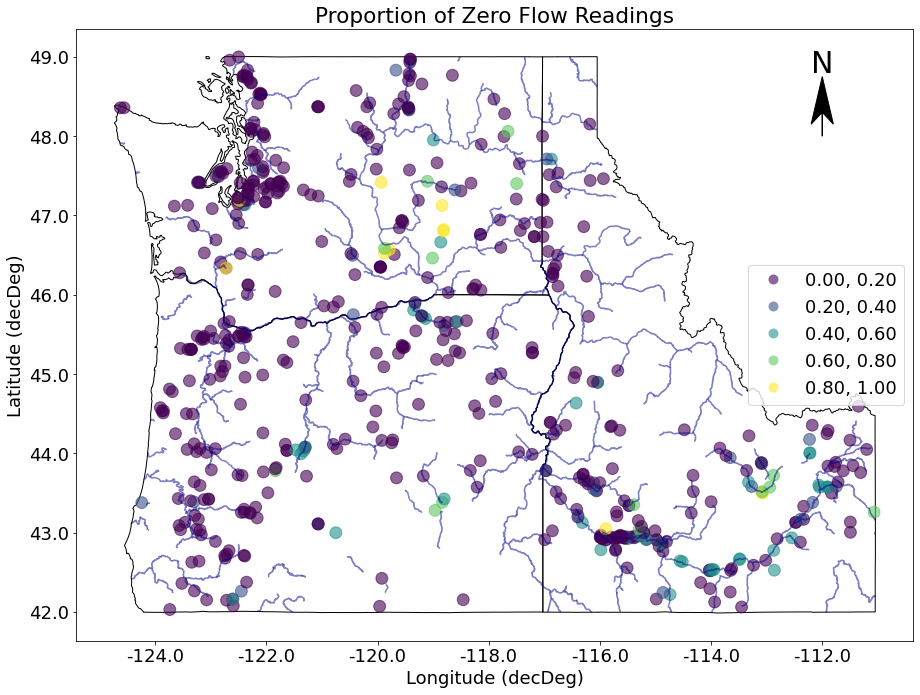

In [122]:
plt.rcParams.update({'font.size': 18})


color_map = {'W': 'lightskyblue',
          'V': 'dodgerblue' ,
          'D': 'navajowhite',
          'M': 'papayawhip',
          'S': 'salmon' ,
          'A': 'orangered' ,
          'B': 'hotpink' }

f,ax = plt.subplots(figsize=(15, 15))

# pnw_hydro_repro.plot(ax=ax,legend=True,color = pnw_hydro_repro['CLASS'].map(color_map),alpha= .6)
states.plot(ax=ax,facecolor="none",edgecolor = "black")
rivs.plot(ax=ax,
          alpha = .5,
          edgecolor='darkblue')
# tt.plot(ax=ax,markersize=140,color = 'black', alpha = .6)
tt.plot(ax=ax,
        markersize=140,
        alpha = .6,
        legend=True,
        scheme="EqualInterval",
#         scheme="HeadTailBreaks",
#         cmap = '',
        column='propZero')

ax.arrow(-112, 48, 0, 0.75, length_includes_head=True,
          head_width=0.4, head_length=0.6, overhang=.25, facecolor='k')
ax.text(x=-112.2, y=48.8, s='N', fontsize=30)
ax.set_xlabel("Longitude (decDeg)")
ax.set_ylabel("Latitude (decDeg)")
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.set_title('Proportion of Zero Flow Readings')

# cx.add_basemap(ax ,reset_extent= False,zoom=9,source=cx.providers.OpenStreetMap.Mapnik)

# f.savefig('../docs/Gages2_PNW.png',dpi=600)
# f.savefig('../docs/Gages2_PNW.pdf')

Text(0.5, 1.0, 'Proportion of <1 cfs Readings')

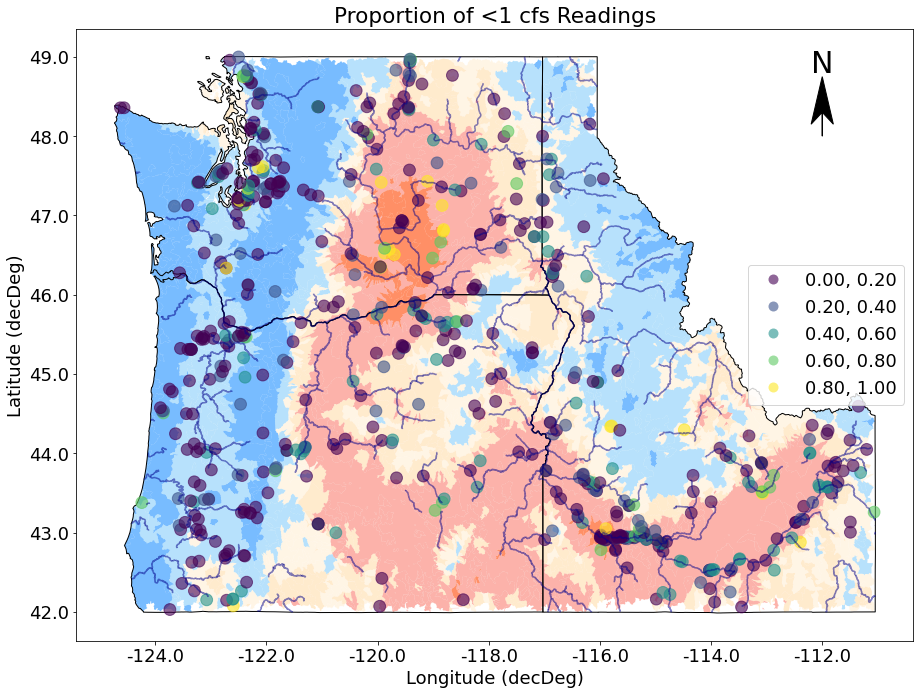

In [124]:
plt.rcParams.update({'font.size': 18})


color_map = {'W': 'lightskyblue',
          'V': 'dodgerblue' ,
          'D': 'navajowhite',
          'M': 'papayawhip',
          'S': 'salmon' ,
          'A': 'orangered' ,
          'B': 'hotpink' }

f,ax = plt.subplots(figsize=(15, 15))

pnw_hydro_repro.plot(ax=ax,legend=True,color = pnw_hydro_repro['CLASS'].map(color_map),alpha= .6)
states.plot(ax=ax,facecolor="none",edgecolor = "black")
rivs.plot(ax=ax,
          alpha = .5,
          edgecolor='darkblue')
# tt.plot(ax=ax,markersize=140,color = 'black', alpha = .6)
tt.plot(ax=ax,
        markersize=140,
        alpha = .6,
        legend=True,
        scheme="EqualInterval",
#         cmap = '',
        column='propOne')

ax.arrow(-112, 48, 0, 0.75, length_includes_head=True,
          head_width=0.4, head_length=0.6, overhang=.25, facecolor='k')
ax.text(x=-112.2, y=48.8, s='N', fontsize=30)
ax.set_xlabel("Longitude (decDeg)")
ax.set_ylabel("Latitude (decDeg)")
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.set_title('Proportion of <1 cfs Readings')


# f.savefig('../docs/Gages2_PNW.png',dpi=600)
# f.savefig('../docs/Gages2_PNW.pdf')

,site_no,dec_lat_va,dec_long_va,gage,numZero,numOne,startDate,endDate,comid,numObs,propZero,propOne,geometry
342,13168600,42.776667,-115.717778,13168600,27,47,1985-03-28,1989-09-29,23288585.0,1646,0.016403,0.028554,POINT (-115.71778 42.77667)
344,13169500,42.785000,-115.983333,13169500,7929,9279,1965-07-08,2004-09-30,23283631.0,14329,0.553353,0.647568,POINT (-115.98333 42.78500)
343,13169000,42.791389,-115.717778,13169000,95,133,1985-03-30,1989-09-29,23288583.0,1644,0.057786,0.080900,POINT (-115.71778 42.79139)
345,13170300,42.906639,-115.892194,13170300,626,662,1985-07-19,1993-06-30,23284773.0,2903,0.215639,0.228040,POINT (-115.89219 42.90664)
346,13170350,42.912500,-115.892778,13170350,322,347,1988-10-02,1994-10-17,23288551.0,2206,0.145966,0.157298,POINT (-115.89278 42.91250)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,12202310,48.754000,-122.354053,12202310,438,3696,2002-05-23,2020-12-31,24534746.0,6797,0.064440,0.543769,POINT (-122.35405 48.75400)
105,12202450,48.769277,-122.406555,12202450,178,4560,2001-10-02,2020-12-31,NaN,7030,0.025320,0.648649,POINT (-122.40655 48.76928)
107,12210900,48.832614,-122.339050,12210900,359,2122,1998-10-02,2020-12-31,23955904.0,8126,0.044179,0.261137,POINT (-122.33905 48.83261)
109,12214000,48.956779,-122.659616,12214000,0,41,1950-01-02,1954-10-31,24534576.0,1763,0.000000,0.023256,POINT (-122.65962 48.95678)
